## HW3
### Juan Francisco Cisneros, Randall Mencías, Christian Santamaria

## Part 1: picoCTF

- Solve the exercises in the picoCTF platform
- Explain the method you used to find the flag
- Provide an explanation of wich OWASP Top 10 was exploited
- What would be a way to patch the vulnerability?

### Exercise 1: Local Authority

### Step 1: 
The problem presents us with a login page that we need to bypass. Within a first inspection of the code within the webpage there is no mention of the flag of any particular vulnerability. The page ask that we input a username and password that are alphanumeric.
### Step 2: 
Try a default password like admin and password. This takes to a login failed page in which upon inspecting the received javascript documents in $Secure.js$ we can read a default password that is used for the admin login
### Step 3:
We try the admin password: strongPassword098765 and get the flag: $picoCTF{j5_15_7r4n5p4r3n7_05df90c8}$


### Explanation of wich OWASP Top 10 was exploited

 A07:2021 - Identification and Authentication Failures was the OWASP Top 10 vulnerability that was exploited in this exercise. The application had a hardcoded default password in the JavaScript file (Secure.js) that could be easily discovered by inspecting the source code.

 ### How can we patch the vulnerability?
 First we need to remove hardcoded credentials from client-side code, we need to ensure credentials are never stored or transmitted in plain text. Implementing a proper server-side authentication mechanism is the next step. We need to then secure the password by hashing it, salting it and save it in a database. Implementing multi-factor authentication is also needed to prevent unauthorized access.


### Exercise 2: WebDecode

### Step 1: 
The first important thing according to the hints is to inspect the code of the page. Other than the dark logo there is nothing particular to be seen in first instance .

### Step 2: 
A deeper inspection of the code in the about section reveals a hidden box that $href =index.html$ that is not visible in the page.

### Step 3:
 When clicked the box takes us back to the homepage where the source code is analyzed once again. When looking at the source code in the about section a > new text has appeared:  **notify_true="cGljb0NURnt3ZWJfc3VjYzNzc2Z1bGx5X2QzYzBkZWRfMWY4MzI2MTV9"4**
 
### Step 4:

Utilizing cyberchef and analyzing the string we can infer that the string is base64 encoded. Decoding the string we get the flag: *picoCTF{web_succ3ssfully_d3c0ded_1f832615}*

### Explanation of wich OWASP Top 10 was exploited

A04:2021 – Insecure Design was the exploited vulnerability. The application used base64 encoding to "hide" information, which can be easily decoded. While not a direct security vulnerability, it demonstrates poor handling of sensitive information.

 ### How can we patch the vulnerability?

 The application should not use base64 encoding to "hide" information. Instead, it should use a secure encryption algorithm, such as AES, to encrypt the sensitive information and store it in a database. This will ensure that the information is not easily decoded and will protect it from unauthorized access. Also, having hidden information in the HTML source code is a security risk, as it can be easily viewed by anyone who has basic knowledge of HTML.

### Exercise 3: More SQLi

### Step 1: 
As we get to the page we have too main hints that allows use to decipher what we should be doing. The first is that its a login page and the second is the name of the challange `More SQLi`. This hints that we should be looking for a SQL injection vulnerability in the login page.

trying default logins takes us to a failed login page gives us the hint `SQL query: SELECT id FROM users WHERE password = 'password' AND username = 'admin'`. Confirming that wee need an sql injection to bypass the login page. 

### Step 2:
We attempt to bypass the login page by inputting the following string: ` OR '1' = '1 --` in the user and password page bypassinsg the login page

### Step 3:
We are presented with a search bar and a table with |city|Address|Phone| with different values. The city of kampala gives us the hint "maybe all the tables". This suggests that we should use the search bar to search for all the tables in the database. To do this we first must identify the all the tables in the database. which we can extract with `' UNION SELECT name, sql, null from sqlite_master;--` as que know that the database is sqlite.

In one of the tables we find that there is a flag  atribute `CREATE TABLE more_table (id INTEGER NOT NULL PRIMARY KEY, flag TEXT)`


we query the search bar with the following string: ` ' UNION SELECT flag, null, null from more_table;--`  to get the flag from the table `more_table` and get the flag `picoCTF{G3tting_5QL_1nJ3c7I0N_l1k3_y0u_sh0ulD_62aa7500}	`


### Explanation of wich OWASP Top 10 was exploited

A03:2021 – Injection was the exploited vulnerability. The login page and search functionality were vulnerable to SQL injection attacks, allowing an attacker to bypass authentication and extract database information by manipulating SQL queries.
 
 ### How can we patch the vulnerability?

Send all the inputs using parameterized queries or prepared statements, implement input validation and sanitization before using them in SQL queries. Apply the principle of least privilege for database accounts, giving users only the permissions they need to perform their tasks then we can implement proper error handling that doesn't reveal database information to the attacker.


## Part 2: WAF

Web application firewalls (WAFs) are a technology that helps protect web applications from common attacks.

- Deploy DVWA in a container, virtual machine, or a cloud provider
- Use a WAF, open source or cloud based, to protect this application
- Demonstrate that attack are not possible anymore against your application 

We use Azure cloud to deploy DVWA. We follow these steps:

1. Create a new resource group. Location was setup to Central US for this example, but it's not mandatory.

```az group create --name dvwaresourcegroup --location centralus```

2. Create a new container registry.

```az acr create --resource-group dvwaresourcegroup --name dvwaregistry --sku Basic```

3. Login to the container registry.

```az acr login --name dvwaregistry```

4. Pull the docker image for DVWA.

```docker pull vulnerables/web-dvwa```

5. Tag the image. Then, push the image to the container registry.

```docker tag vulnerables/web-dvwa dvwaregistry.azurecr.io/dvwa```

```docker push dvwaregistry.azurecr.io/dvwa```

6. Using the Azure portal, create a new container instance. Use the image from the container registry. 
7. DVWA is now running in Azure. We can access it through the public IP address of the container instance.

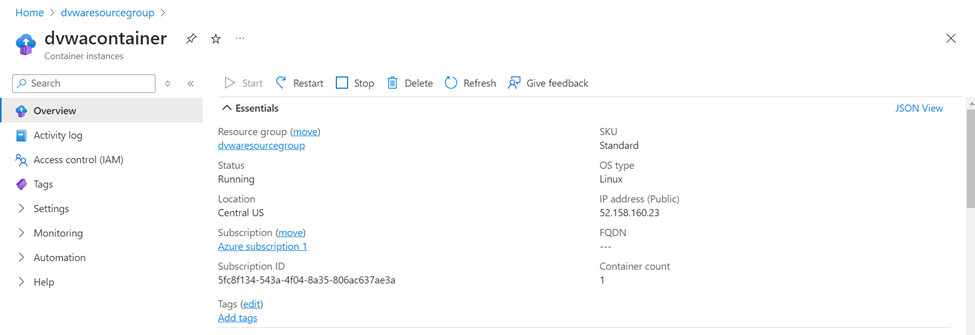

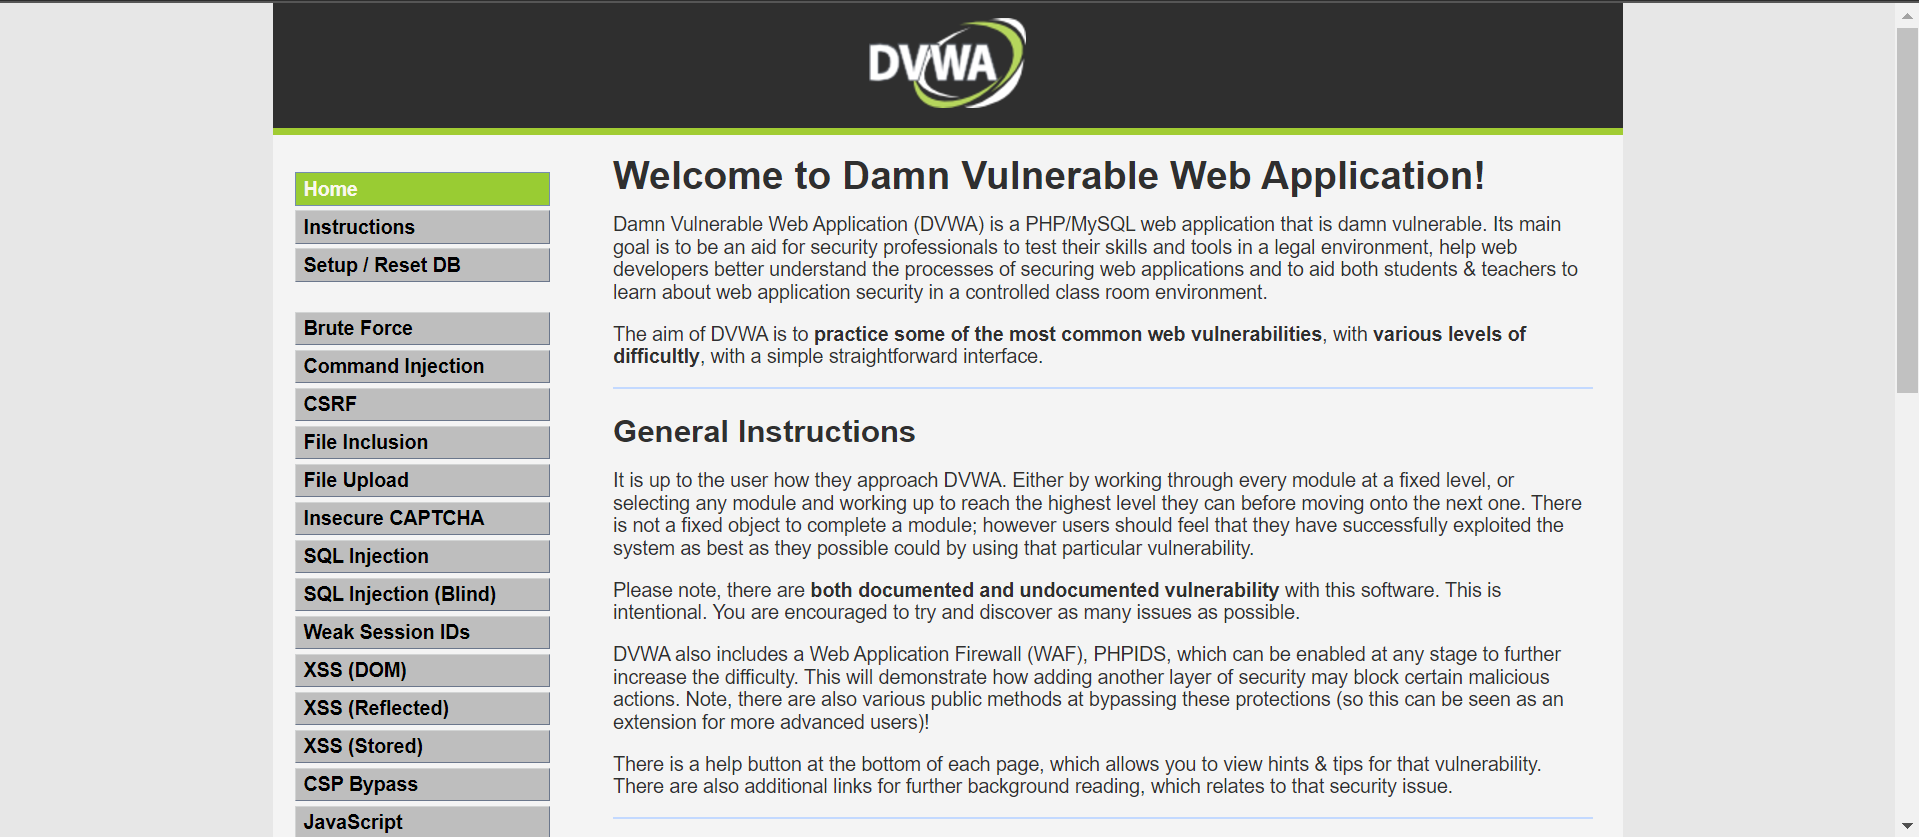

For the WAF, we create a gateway in Azure. We follow these steps:

1. Inside the created resource group in Azure, create a new Application Gateway. And create a Virtual Network keeping default settings and subnet. We select Tier as WAF V2. Also, we have in backend pools the public IP address of the container instance where DVWA is running.


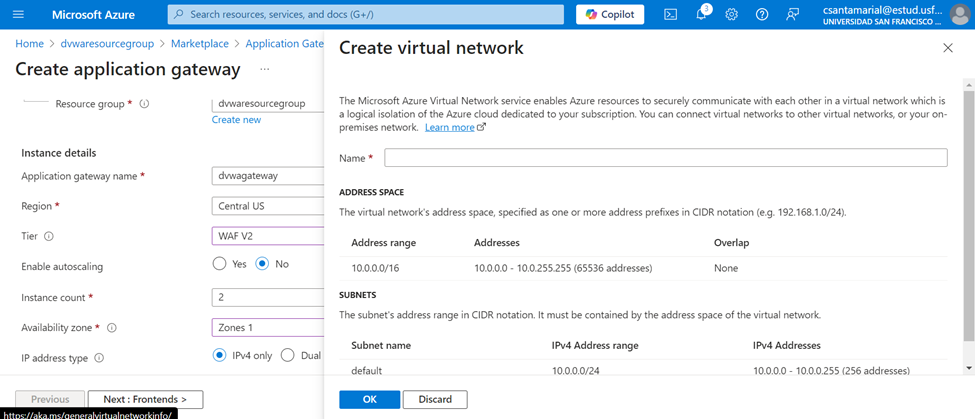

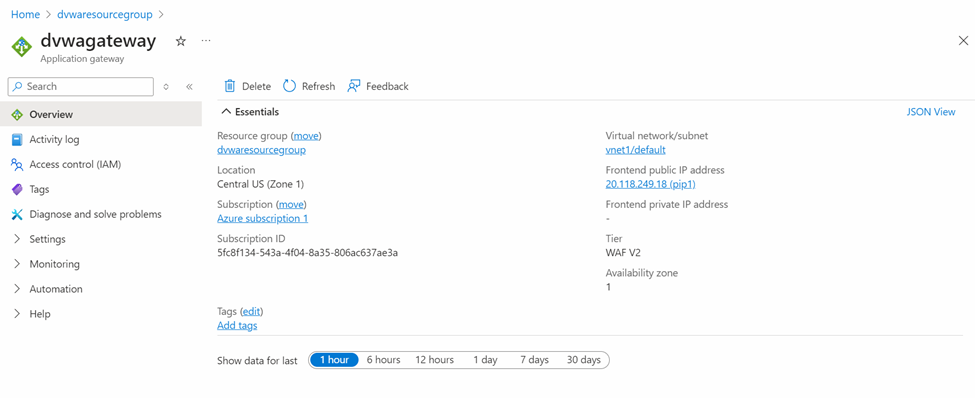

2. In gateway configuration we attached a wafpolicy, and in the wafpolicy we selected the OWASP 3.1 policy (default by Azure). OWASP 3.1 is a set of rules that can be used to protect web applications from common attacks, for example, SQL injection, cross-site scripting, and more.

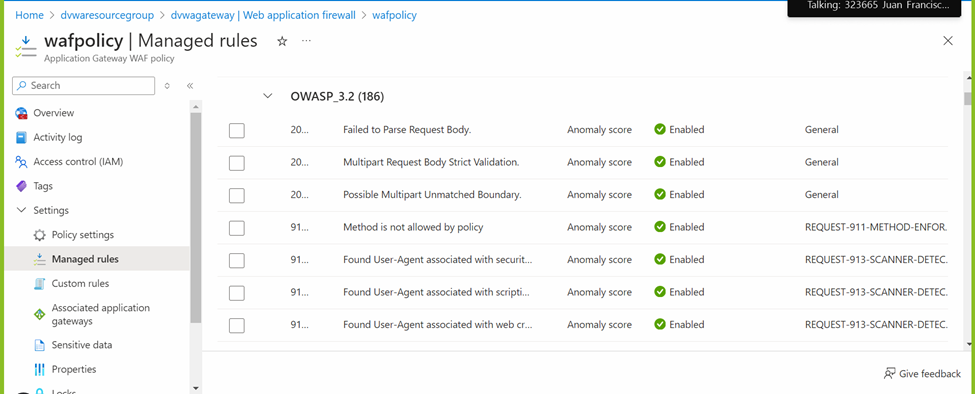

3. Then we change the WAF mode from detection to prevention, and configure the logger.

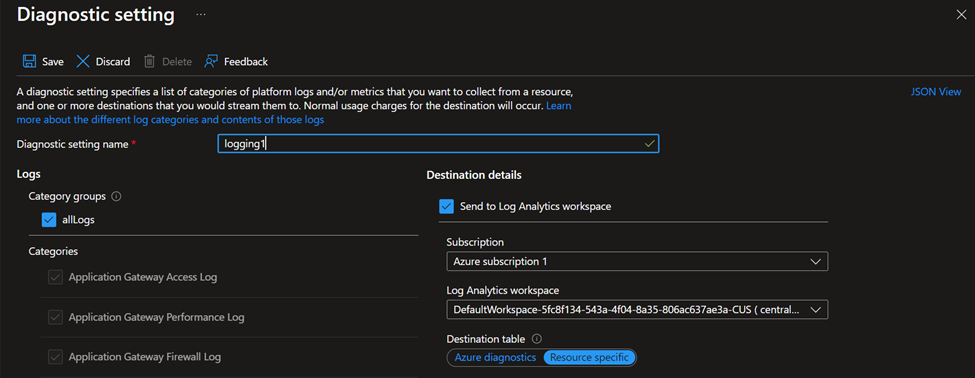

4. It's important to mention that the attack testing has to be done in the public IP address of the Application Gateway, not in the public IP address of the container instance. Now, if we perform an SQL injection attack, we get the followwing logs:
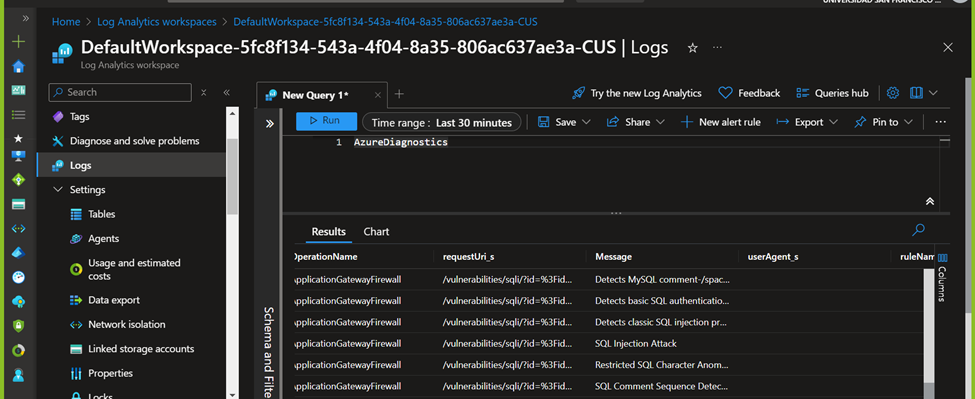

You can see the full log in the file `logs_gateway.csv` in the repository.

This is how the attacker sees the response:
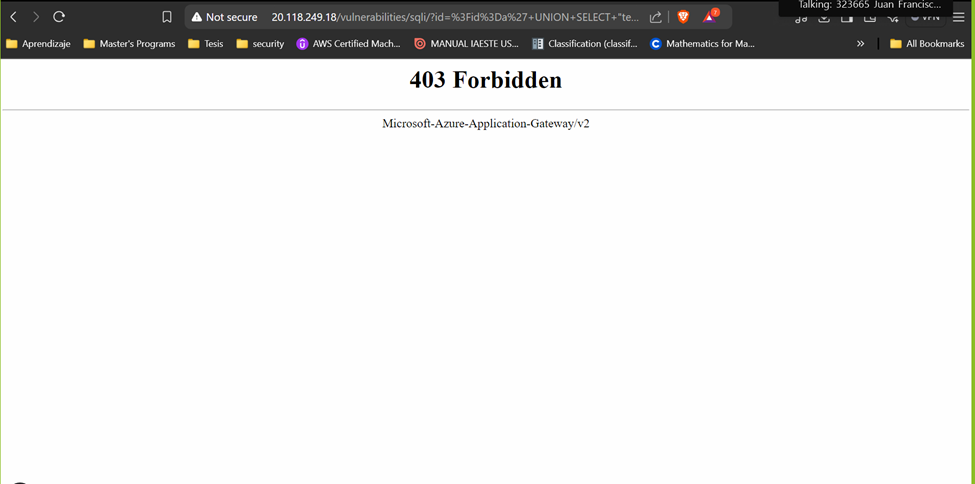